<a href="https://colab.research.google.com/github/Jennyasmim/Airlines-Delay-BigData/blob/main/Airlines_Delay_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airlines Delay
O dataset Airlines Delay é uma fonte crucial de informações sobre atrasos em voos nos Estados Unidos, contendo variáveis como companhia aérea, atrasos na chegada e partida, e categorias específicas de atraso como devido à companhia e ao clima. A partir desses dados, é possível extrair insights significativos sobre tendências sazonais, desempenho das companhias em termos de pontualidade, e causas principais de atrasos. Visualizações exploratórias, como gráficos de barras e de violino, facilitam a comparação entre companhias e a identificação de padrões que podem orientar melhorias operacionais e estratégias para redução de atrasos na aviação comercial.

EQUIPE:
* Jhennifer Yasmim
* Felipe Cabral
* Felipe Emanoel
* Kayo Vinicius  
* Jonatha Santos
* Mauricio Gomes



# **INSTALANDO PYSPARK**




In [ ]:
!pip install pyspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b90db151b561adfec068b10b79890272c58fd5a3717f73a8c56f6cbddde38387
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


# **BAIXANDO CSV - Airlines Delay**







In [49]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan, avg

# URL do Google Drive
url = 'https://drive.google.com/uc?export=download&id=10BLYKHPTgazbbgOedkQ6Kf1qXsCtJZ2R'

# Baixando o arquivo
output = 'file.csv'
gdown.download(url, output, quiet=False)

# Inicializando o SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

# Lendo o arquivo CSV baixado
data = spark.read.csv(output, header=True, inferSchema=True)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=10BLYKHPTgazbbgOedkQ6Kf1qXsCtJZ2R
From (redirected): https://drive.google.com/uc?export=download&id=10BLYKHPTgazbbgOedkQ6Kf1qXsCtJZ2R&confirm=t&uuid=5cb413b2-aabc-46b5-83e2-2f18945f2c98
To: /content/file.csv
100%|██████████| 248M/248M [00:03<00:00, 71.4MB/s]


# **Dicionário de Dados**
---

| Variável               | Tipo de Dado         | Descrição                                                                   | Tipo           |
|------------------------|----------------------|-----------------------------------------------------------------------------|----------------|
| Year                   | int                  | Ano do voo.                                                                 | numérico       |
| Month                  | int                  | Mês do voo (1 a 12).                                                        | numérico       |
| DayofMonth             | int                  | Dia do mês do voo (1 a 31).                                                 | numérico       |
| DayOfWeek              | int                  | Dia da semana do voo (1 = segunda-feira, 7 = domingo).                      | numérico       |
| DepTime                | double               | Hora real de partida (formato HHMM).                                        | numérico       |
| CRSDepTime             | int                  | Hora programada de partida (formato HHMM).                                  | numérico       |
| ArrTime                | double               | Hora real de chegada (formato HHMM).                                        | numérico       |
| CRSArrTime             | int                  | Hora programada de chegada (formato HHMM).                                   | numérico       |
| UniqueCarrier          | string               | Código da transportadora aérea.                                             | categórico     |
| FlightNum              | int                  | Número do voo.                                                              | numérico       |
| TailNum                | string               | Número de série da aeronave.                                                | categórico     |
| ActualElapsedTime      | double               | Tempo real de voo em minutos.                                               | numérico       |
| CRSElapsedTime         | double               | Tempo programado de voo em minutos.                                         | numérico       |
| AirTime                | double               | Tempo de voo em minutos.                                                    | numérico       |
| ArrDelay               | double               | Atraso na chegada em minutos.                                               | numérico       | target
| DepDelay               | double               | Atraso na partida em minutos.                                               | numérico       |
| Origin                 | string               | Aeroporto de origem.                                                        | categórico     |
| Dest                   | string               | Aeroporto de destino.                                                       | categórico     |
| Distance               | int                  | Distância em milhas entre aeroportos de origem e destino.                   | numérico       |
| TaxiIn                 | double               | Tempo de táxi ao pousar em minutos.                                         | numérico       |
| TaxiOut                | double               | Tempo de táxi ao decolar em minutos.                                        | numérico       |
| Cancelled              | int                  | Indica se o voo foi cancelado (1 = cancelado, 0 = não cancelado).           | numérico       |
| CancellationCode       | string               | Código de motivo de cancelamento (A, B, C, D).                               | categórico     |
| Diverted               | int                  | Indica se o voo foi desviado para outro aeroporto (1 = desviado, 0 = não desviado). | numérico |
| CarrierDelay           | double               | Tempo de atraso atribuído à companhia aérea em minutos.                     | numérico       |
| WeatherDelay           | double               | Tempo de atraso atribuído ao clima em minutos.                              | numérico       |
| NASDelay               | double               | Tempo de atraso atribuído ao Sistema Nacional de Aviação em minutos.        | numérico       |
| SecurityDelay          | double               | Tempo de atraso atribuído à segurança em minutos.                           | numérico       |
| LateAircraftDelay      | double               | Tempo de atraso atribuído à aeronave em minutos.                            | numérico       |




Visualisar os dados:

In [ ]:
pd.DataFrame(data.take(10), columns=data.columns)

,_c0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0




# **Análise Exploratória**



> Verificando se existem dados Null, NaN e duplicados

In [ ]:
# Faz a contagem de valores nulos em cada coluna do dataframe
null_counts = data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns])

null_counts.show()


+---+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|_c0|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+---+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|  0|   0|    0|         0|        0|      0|         0|   7110|         0|       

In [ ]:
# Faz a contagem de valores NaN em cada coluna do dataframe
nan_counts = data.select([count(when(isnan(col(c)), c)).alias(c) for c in data.columns])

nan_counts.show()

+---+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|_c0|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+---+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|  0|   0|    0|         0|        0|      0|         0|      0|         0|       

In [ ]:
duplicados = data.count() - data.dropDuplicates().count()

print(f"Total de registros duplicados: {duplicados}")

Total de registros duplicados: 0


---




# **Separação de tipos de variáveis e adicionando às suas respectivas listas**


In [ ]:
data.dtypes

[('_c0', 'int'),
 ('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'double'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'double'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'double'),
 ('CRSElapsedTime', 'double'),
 ('AirTime', 'double'),
 ('ArrDelay', 'double'),
 ('DepDelay', 'double'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'int'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'int'),
 ('CancellationCode', 'string'),
 ('Diverted', 'int'),
 ('CarrierDelay', 'double'),
 ('WeatherDelay', 'double'),
 ('NASDelay', 'double'),
 ('SecurityDelay', 'double'),
 ('LateAircraftDelay', 'double')]

In [ ]:
nums = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
    'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
    'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn',
    'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
    'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]

In [ ]:
categ = [
    'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'
]

In [ ]:
target = 'ArrDelay'

##Contagem de valores das Variáveis

* Realizando a contagem de valores das
varivaveis numericas e convertendo para um dataframe pandas


In [ ]:
cont_nums = data.select(nums).describe()

cont_nums.show()



+-------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+
|summary|   Year|             Month|        DayofMonth|         DayOfWeek|           DepTime|        CRSDepTime|          ArrTime|       CRSArrTime|         FlightNum| ActualElapsedTime|   CRSElapsedTime|           AirTime|          DepDelay|         Distance|           TaxiIn|           TaxiOut|           Cancelled|            Diverted|      CarrierDelay|      WeatherDelay|          NASDelay|      SecurityDelay| LateAircraftDelay|
+-------+-------+------------------+------------------+------------------+------------------+------------------+----------------

* Realizando a contagem de valores das varivaveis Categoricas e convertendo
para um dataframe pandas


In [ ]:
for coluna in categ:
    print(f"Contagem de valores para {coluna}:")
    data.groupBy(coluna).agg(count(coluna).alias('count')).show()
    print("\n")

Contagem de valores para UniqueCarrier:
+-------------+------+
|UniqueCarrier| count|
+-------------+------+
|           UA|141426|
|           AA|191865|
|           NW| 79108|
|           EV| 81877|
|           B6| 55315|
|           DL|114238|
|           OO|132433|
|           F9| 28269|
|           YV| 67063|
|           US| 98425|
|           AQ|   750|
|           MQ|141920|
|           OH| 52657|
|           HA|  7490|
|           XE|103663|
|           AS| 39293|
|           FL| 71284|
|           CO|100195|
|           WN|377602|
|           9E| 51885|
+-------------+------+



Contagem de valores para TailNum:
+-------+-----+
|TailNum|count|
+-------+-----+
| N672SW|  633|
| N466SW|  457|
| N866AS|  260|
| N516UA|  389|
| N513UA|  419|
| N919UA|  363|
| N102UW|  290|
|  N6700|  304|
| N902DE|  418|
| N388DA|  238|
| N686AE|  493|
| N502US|  303|
| N331NB|  216|
| N369NB|  248|
| N855NW|    4|
| 89709E|  295|
| N396AA|   85|
| N3CWAA|  310|
| N407AA|  285|
| N499AA|  459|
+--

* Realizando a contagem de valores da variavel target

In [ ]:
value_counts = data.groupBy('ArrDelay').count().orderBy('count', ascending=False)
value_counts.show()

+--------+-----+
|ArrDelay|count|
+--------+-----+
|    10.0|36291|
|     8.0|35902|
|     7.0|35869|
|     9.0|35782|
|     6.0|35522|
|    11.0|35490|
|    12.0|34927|
|     5.0|34517|
|    13.0|34173|
|     4.0|33528|
|    14.0|33379|
|    15.0|32476|
|     3.0|32157|
|    16.0|31198|
|    17.0|30288|
|     2.0|30138|
|    18.0|29816|
|    19.0|28658|
|    20.0|28644|
|     1.0|28252|
+--------+-----+
only showing top 20 rows



---


# Análise e Projeção de Atrasos na Chegada de Voos por Dia da Semana


Este insight analisa os padrões de atrasos na chegada de voos ao longo da semana atual e projeta esses padrões para a próxima semana. A visualização compara os dados históricos com a projeção futura, oferecendo insights sobre possíveis tendências de atrasos.



In [ ]:

# Verificando se houve atraso na chegada
data_with_delay = data.withColumn('Delayed', when(col('ArrDelay') > 0, 'Delayed').otherwise('OnTime'))

# Calculando o número de voos com atraso e sem atraso por dia da semana
delay_count_per_day = data_with_delay.groupBy('DayOfWeek', 'Delayed').count().orderBy('DayOfWeek', 'Delayed')

delay_count_per_day.show()

+---------+-------+------+
|DayOfWeek|Delayed| count|
+---------+-------+------+
|        1|Delayed|258998|
|        1| OnTime| 31935|
|        2|Delayed|232407|
|        2| OnTime| 28536|
|        3|Delayed|233500|
|        3| OnTime| 29305|
|        4|Delayed|258790|
|        4| OnTime| 30661|
|        5|Delayed|291280|
|        5| OnTime| 31979|
|        6|Delayed|193890|
|        6| OnTime| 29366|
|        7|Delayed|254550|
|        7| OnTime| 31561|
+---------+-------+------+



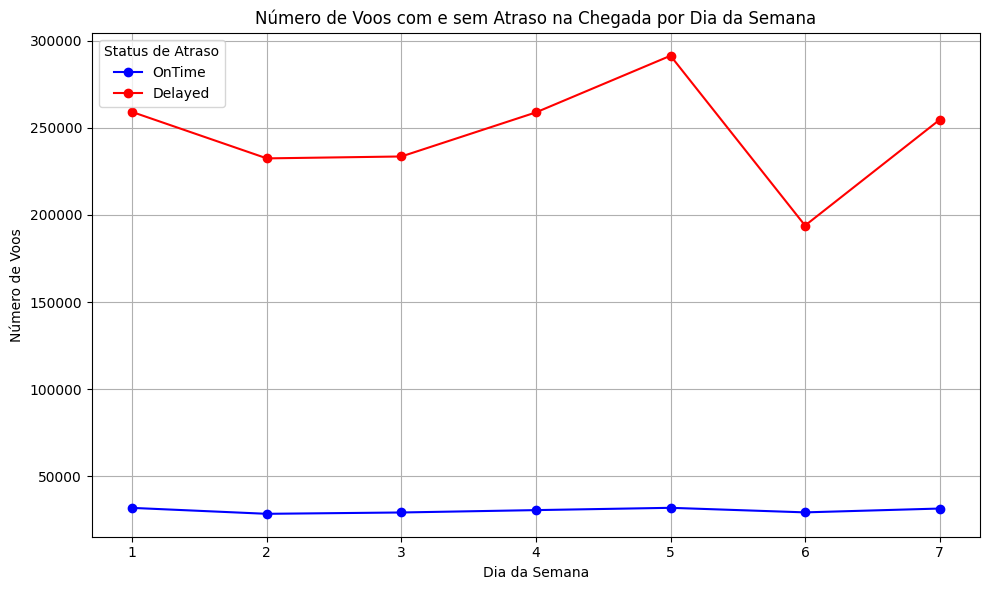

In [ ]:
#Convertendo para Pandas para plotagem
delay_count_pd = delay_count_per_day.toPandas()

#Pivotando os dados para preparar o gráfico de linhas
delay_count_pivot = delay_count_pd.pivot(index='DayOfWeek', columns='Delayed', values='count').reset_index()

#Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(delay_count_pivot['DayOfWeek'], delay_count_pivot['OnTime'], marker='o', linestyle='-', color='b', label='OnTime')
plt.plot(delay_count_pivot['DayOfWeek'], delay_count_pivot['Delayed'], marker='o', linestyle='-', color='r', label='Delayed')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Voos')
plt.title('Número de Voos com e sem Atraso na Chegada por Dia da Semana')
plt.xticks(delay_count_pivot['DayOfWeek'])
plt.legend(title='Status de Atraso', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

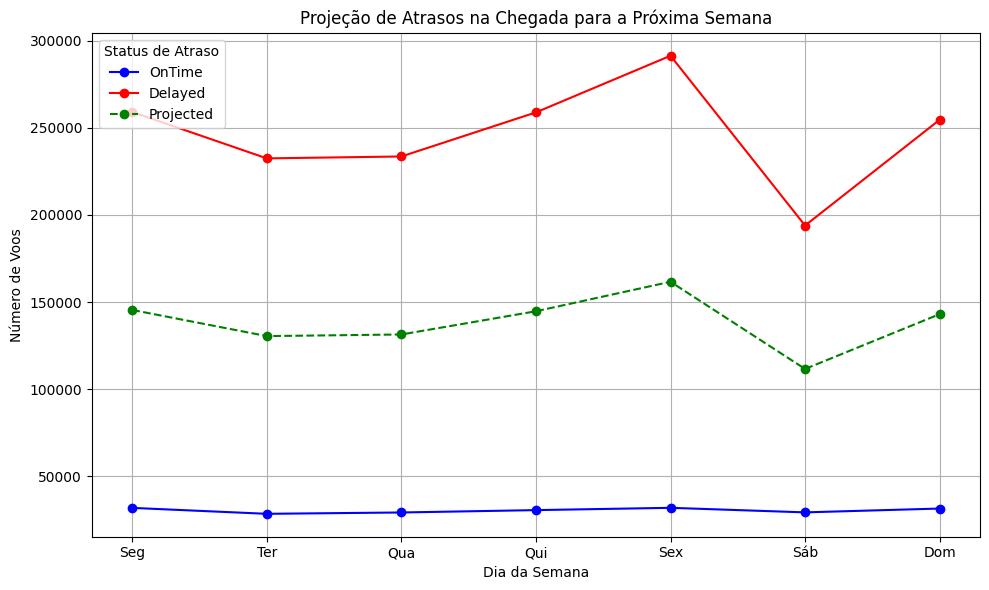

In [ ]:
import numpy as np
import pyspark.sql.functions as F

# utilizando a variavel delay_count_per_day como mostrado no grafico anterior

# Calculando a média de atrasos por dia da semana
average_delay_per_day = delay_count_per_day.groupBy('DayOfWeek').agg(F.avg('count').alias('AvgDelay')).orderBy('DayOfWeek')

# Supondo que estamos projetando para a próxima semana
next_week_days = np.arange(1, 8)

# Projeção hipotética de atrasos para a próxima semana
projected_delays = np.array(average_delay_per_day.select('AvgDelay').collect()).flatten()

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(delay_count_pivot['DayOfWeek'], delay_count_pivot['OnTime'], marker='o', linestyle='-', color='b', label='OnTime')
plt.plot(delay_count_pivot['DayOfWeek'], delay_count_pivot['Delayed'], marker='o', linestyle='-', color='r', label='Delayed')
plt.plot(next_week_days, projected_delays, marker='o', linestyle='--', color='g', label='Projected')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Voos')
plt.title('Projeção de Atrasos na Chegada para a Próxima Semana')
plt.xticks(np.arange(1, 8), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.legend(title='Status de Atraso', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


---

# Comparação de Atrasos Médios na Chegada entre Companhias Aéreas

Este insight analisa e compara os atrasos médios na chegada entre diversas companhias aéreas. Os códigos utilizados calculam estatísticas como a média de atrasos e empregam gráficos de barras e de linha para visualizar e contrastar os padrões de atraso entre as companhia.

In [50]:
# Calculando estatísticas de atraso na saída por companhia aérea
delay_stats_per_carrier = data.groupBy('UniqueCarrier').agg(
    {'DepDelay': 'mean', 'CarrierDelay': 'mean', 'WeatherDelay': 'mean'}
).orderBy('UniqueCarrier')

# Convert to Pandas for plotting
delay_stats_per_carrier_pd = delay_stats_per_carrier.toPandas()

delay_stats_per_carrier_pd


,UniqueCarrier,avg(CarrierDelay),avg(DepDelay),avg(WeatherDelay)
0,9E,25.497713,47.370338,4.189330
1,AA,21.336542,46.481953,3.165632
2,AQ,24.535294,26.680000,1.732353
3,AS,20.065592,38.300435,1.975304
4,B6,17.684819,55.030570,1.444314
5,CO,16.896112,43.138680,3.397028
6,DL,19.531916,39.059306,2.313071
7,EV,29.708864,48.308463,9.953453
8,F9,15.576286,27.701227,1.318507
9,FL,9.334681,42.535239,0.781958


<ipython-input-43-61a6d2de19b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UniqueCarrier', y='avg(DepDelay)', data=delay_stats_pd, palette='Set2')


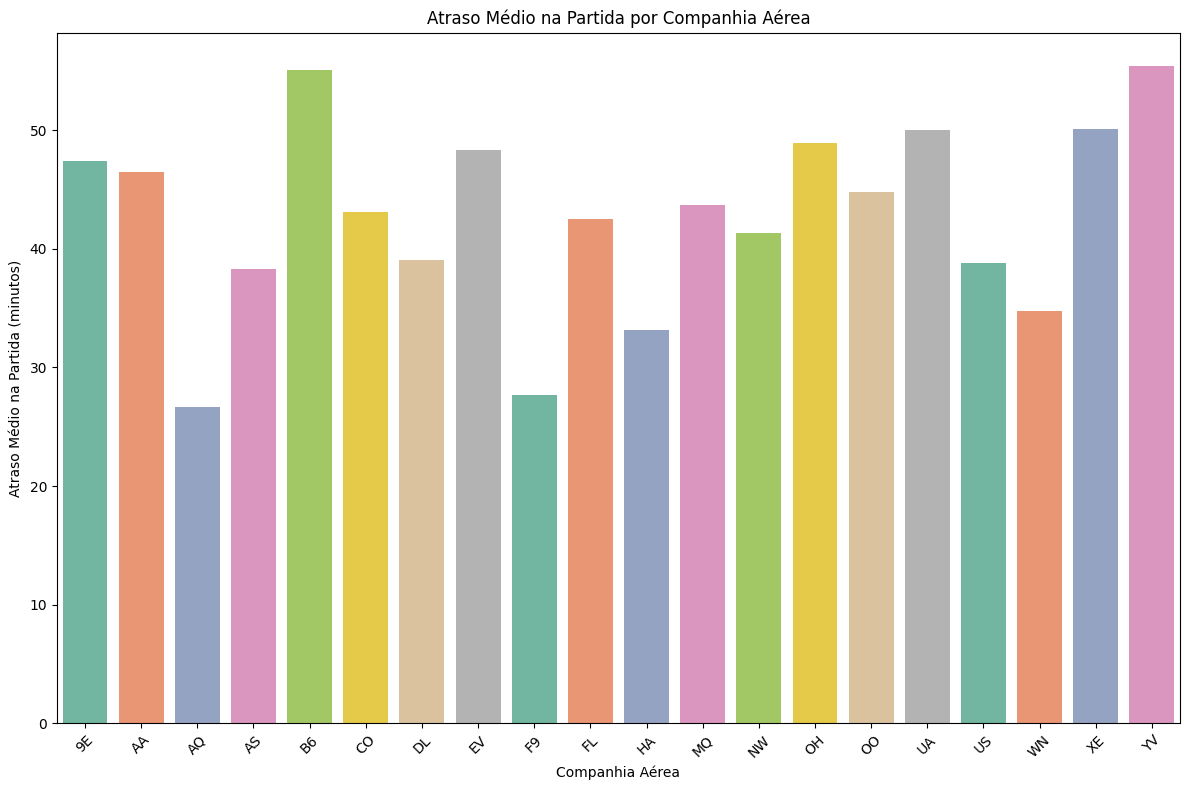

In [43]:
# Convertendo para Pandas para plotagem
delay_stats_pd = delay_stats_per_carrier.toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(x='UniqueCarrier', y='avg(DepDelay)', data=delay_stats_pd, palette='Set2')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio na Partida (minutos)')
plt.title('Atraso Médio na Partida por Companhia Aérea')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


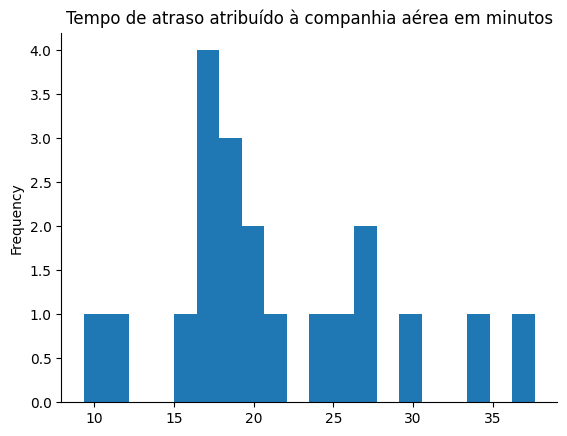

In [28]:
# Histograma do tempo de atraso atribuído à companhia aérea em minutos:
delay_stats_per_carrier_pd['avg(CarrierDelay)'].plot(kind='hist', bins=20, title='Tempo de atraso atribuído à companhia aérea em minutos')
plt.gca().spines[['top', 'right']].set_visible(False)

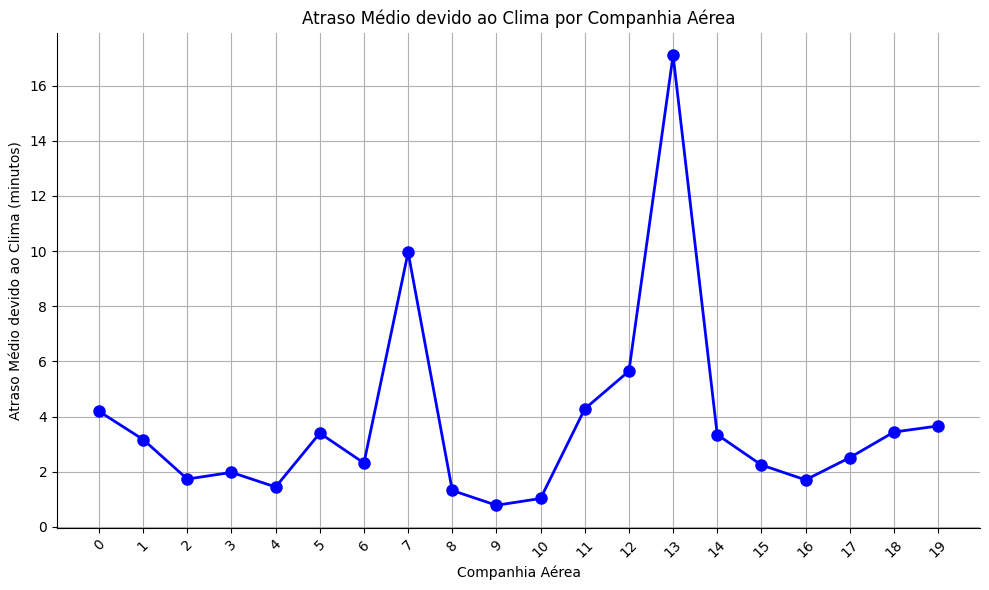

In [53]:
# Plotando o gráfico de linha para o atraso médio devido ao clima
plt.figure(figsize=(10, 6))  # Ajustando o tamanho da figura
delay_stats_per_carrier_pd['avg(WeatherDelay)'].plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.title('Atraso Médio devido ao Clima por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio devido ao Clima (minutos)')
plt.xticks(ticks=range(len(delay_stats_per_carrier_pd)), labels=delay_stats_per_carrier_pd.index, rotation=45)  # Definindo os rótulos do eixo x
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


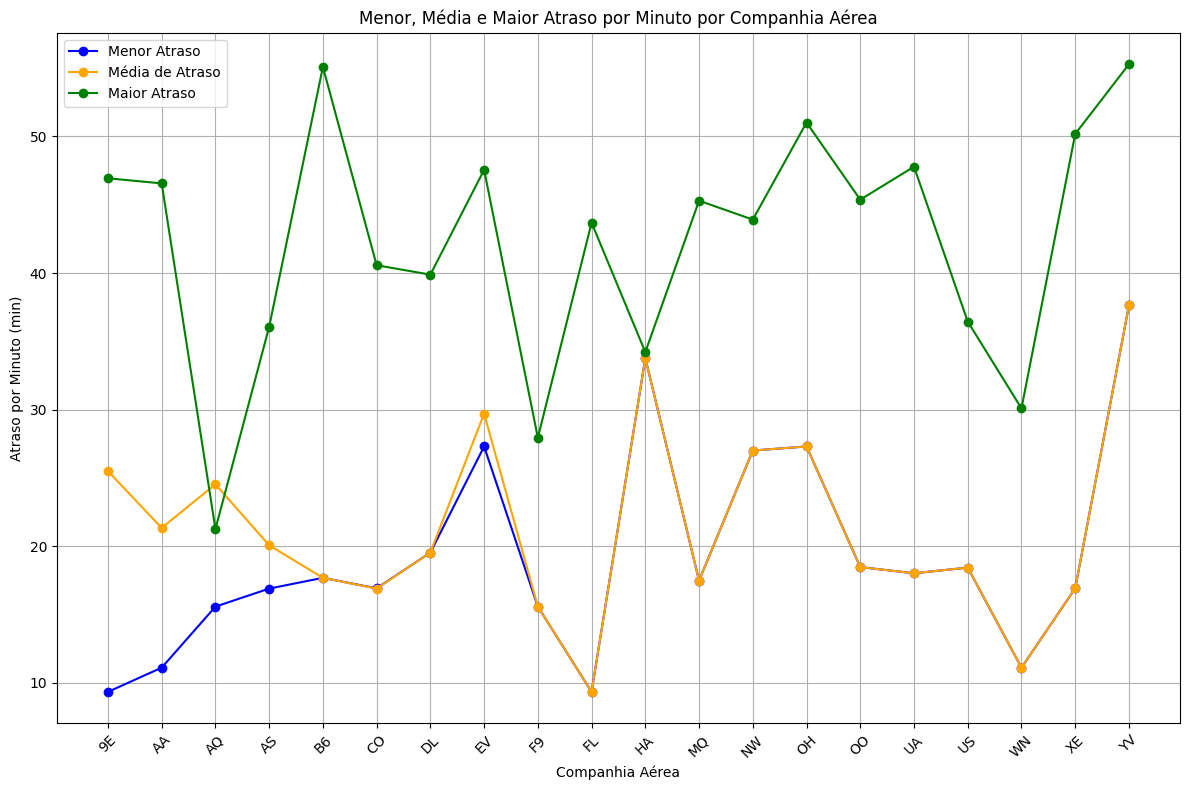

In [35]:
# Dados das companhias aéreas com menor, média e maior atraso por minuto
data = {
    'UniqueCarrier': ['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL',
                      'HA', 'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'],
    'Menor Atraso': [9.334681, 11.107355, 15.576286, 16.896112, 17.684819,
                     16.914912, 19.531916, 27.302573, 15.576286, 9.334681,
                     33.769017, 17.480098, 27.002904, 27.302573, 18.470868,
                     18.018646, 18.432597, 11.107355, 16.914912, 37.633791],
    'Média de Atraso': [25.497713, 21.336542, 24.535294, 20.065592, 17.684819,
                        16.896112, 19.531916, 29.708864, 15.576286, 9.334681,
                        33.769017, 17.480098, 27.002904, 27.302573, 18.470868,
                        18.018646, 18.432597, 11.107355, 16.914912, 37.633791],
    'Maior Atraso': [46.936493, 46.561553, 21.255376, 36.060882, 55.088739,
                     40.568449, 39.881507, 47.554255, 27.938953, 43.683157,
                     34.209449, 45.295058, 43.911000, 51.016968, 45.370587,
                     47.784399, 36.445019, 30.087884, 50.181217, 55.287049]
}

# Convertendo para DataFrame
df = pd.DataFrame(data)

# Plotando o gráfico de linhas
plt.figure(figsize=(12, 8))

# Plotando as linhas para menor, média e maior atraso
plt.plot(df['UniqueCarrier'], df['Menor Atraso'], marker='o', linestyle='-', color='blue', label='Menor Atraso')
plt.plot(df['UniqueCarrier'], df['Média de Atraso'], marker='o', linestyle='-', color='orange', label='Média de Atraso')
plt.plot(df['UniqueCarrier'], df['Maior Atraso'], marker='o', linestyle='-', color='green', label='Maior Atraso')

# Adicionando detalhes ao gráfico
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso por Minuto (min)')
plt.title('Menor, Média e Maior Atraso por Minuto por Companhia Aérea')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
